# New York City Jobs EDA

In [1]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

## Data Cleaning and Preparation 

In [2]:
#load flat file dataset & select columns needed for analysis
data = pd.read_csv('/Volumes/Nakya SSD/Bellevue Univ/Masters in Data Science/DSC 680 Applied Data Science/Portfolio/Jobs_NYC_Postings_20250421.csv')


In [3]:
data = data[['Job ID','Civil Service Title','Agency','# Of Positions', 'Business Title',\
             'Posting Type','Job Category','Career Level','Salary Frequency','Salary Range From','Salary Range To',\
                           'Posting Date','Full-Time/Part-Time indicator']]
data.head()

,Job ID,Civil Service Title,Agency,# Of Positions,Business Title,Posting Type,Job Category,Career Level,Salary Frequency,Salary Range From,Salary Range To,Posting Date,Full-Time/Part-Time indicator
0,705427,PUBLIC HEALTH ADVISER (SCHOOL,DEPT OF HEALTH/MENTAL HYGIENE,1,"Public Health Adviser, Bureau of School Health",External,Health,Experienced (non-manager),Hourly,24.1,27.71,03/05/2025,P
1,709397,ADMINISTRATIVE CONTRACT SPECIA,DEPT OF HEALTH/MENTAL HYGIENE,1,"Contract Manager, Center for Population Health...",External,"Finance, Accounting, & Procurement",Experienced (non-manager),Annual,66067.0,95000.00,03/31/2025,F
2,622069,ADMIN COMMUNITY RELATIONS SPEC,DEPT. OF HOMELESS SERVICES,1,JCC MANAGER,Internal,Constituent Services & Community Programs Soci...,Experienced (non-manager),Annual,64749.0,69826.00,01/05/2024,F
3,703369,COLLEGE AIDE (ALL CITY DEPTS),DEPT OF HEALTH/MENTAL HYGIENE,1,"Food Borne Intern, Bureau of Environmental Dis...",Internal,Health,Student,Hourly,17.0,21.40,02/19/2025,P
4,633825,"CITY ASSESSOR (I,II,IIIA,IIIB)",TAX COMMISSION,1,City Assessor Hearing Officer Deputy Director,Internal,"Policy, Research & Analysis",Experienced (non-manager),Annual,0.0,147110.00,04/18/2024,F


In [4]:
# check the total rows/columns
data.shape

(6563, 13)

In [8]:
data.describe()

,Job ID,# Of Positions,Salary Range From,Salary Range To
count,6563.000000,6563.000000,6563.000000,6563.000000
mean,668087.239525,1.948194,64702.997548,89211.980243
std,47861.193376,6.622286,31983.136830,50006.046297
min,469953.000000,1.000000,0.000000,16.500000
25%,636684.000000,1.000000,53074.000000,64760.000000
50%,691373.000000,1.000000,64242.000000,85998.000000
75%,703830.000000,1.000000,81571.000000,113591.000000
max,711116.000000,243.000000,225000.000000,283814.000000


In [5]:
# check for null/missing values
data.isna().sum()

Job ID                           0
Civil Service Title              0
Agency                           0
# Of Positions                   0
Business Title                   0
Posting Type                     0
Job Category                     0
Career Level                     0
Salary Frequency                 0
Salary Range From                0
Salary Range To                  0
Posting Date                     0
Full-Time/Part-Time indicator    0
dtype: int64

In [6]:
# check data types
data.dtypes

Job ID                             int64
Civil Service Title               object
Agency                            object
# Of Positions                     int64
Business Title                    object
Posting Type                      object
Job Category                      object
Career Level                      object
Salary Frequency                  object
Salary Range From                float64
Salary Range To                  float64
Posting Date                      object
Full-Time/Part-Time indicator     object
dtype: object

In [9]:
# drop duplicates if they exist
data.drop_duplicates()

,Job ID,Civil Service Title,Agency,# Of Positions,Business Title,Posting Type,Job Category,Career Level,Salary Frequency,Salary Range From,Salary Range To,Posting Date,Full-Time/Part-Time indicator
0,705427,PUBLIC HEALTH ADVISER (SCHOOL,DEPT OF HEALTH/MENTAL HYGIENE,1,"Public Health Adviser, Bureau of School Health",External,Health,Experienced (non-manager),Hourly,24.1,27.71,03/05/2025,P
1,709397,ADMINISTRATIVE CONTRACT SPECIA,DEPT OF HEALTH/MENTAL HYGIENE,1,"Contract Manager, Center for Population Health...",External,"Finance, Accounting, & Procurement",Experienced (non-manager),Annual,66067.0,95000.00,03/31/2025,F
2,622069,ADMIN COMMUNITY RELATIONS SPEC,DEPT. OF HOMELESS SERVICES,1,JCC MANAGER,Internal,Constituent Services & Community Programs Soci...,Experienced (non-manager),Annual,64749.0,69826.00,01/05/2024,F
3,703369,COLLEGE AIDE (ALL CITY DEPTS),DEPT OF HEALTH/MENTAL HYGIENE,1,"Food Borne Intern, Bureau of Environmental Dis...",Internal,Health,Student,Hourly,17.0,21.40,02/19/2025,P
4,633825,"CITY ASSESSOR (I,II,IIIA,IIIB)",TAX COMMISSION,1,City Assessor Hearing Officer Deputy Director,Internal,"Policy, Research & Analysis",Experienced (non-manager),Annual,0.0,147110.00,04/18/2024,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6558,688945,PRINCIPAL ADMINISTRATIVE ASSOC,HRA/DEPT OF SOCIAL SERVICES,1,ONBOARDING SCHEDULING COORDINATOR,Internal,Administration & Human Resources,Experienced (non-manager),Annual,64137.0,73758.00,11/18/2024,F
6559,702177,PRINCIPAL ADMINISTRATIVE ASSOC,FIRE DEPARTMENT,1,Budget Analyst,External,"Finance, Accounting, & Procurement",Experienced (non-manager),Annual,66062.0,100958.00,02/11/2025,F
6560,638896,PRINCIPAL ADMINISTRATIVE ASSOC,HRA/DEPT OF SOCIAL SERVICES,1,SENIOR CASE REVIEWER,Internal,Constituent Services & Community Programs Comm...,Experienced (non-manager),Annual,64137.0,73758.00,01/22/2025,F
6561,642273,PRINCIPAL ADMINISTRATIVE ASSOC,HRA/DEPT OF SOCIAL SERVICES,1,MEDICAID UNIT SUPERVISOR,External,Social Services,Experienced (non-manager),Annual,64137.0,73758.00,07/12/2024,F


In [10]:
# convert posting date into datetime format
data['Posting Date'] = pd.to_datetime(data['Posting Date'])
# verify the data type change 
print(data['Posting Date'].dtype)

datetime64[ns]


In [11]:
# reformat the column names to snakecase and remove spaces and other charracters
data.columns = data.columns.str.strip().str.replace(r'[ /]', '_', regex=True)
data.head().T #transpose

,0,1,2,3,4
Job_ID,705427,709397,622069,703369,633825
Civil_Service_Title,PUBLIC HEALTH ADVISER (SCHOOL,ADMINISTRATIVE CONTRACT SPECIA,ADMIN COMMUNITY RELATIONS SPEC,COLLEGE AIDE (ALL CITY DEPTS),"CITY ASSESSOR (I,II,IIIA,IIIB)"
Agency,DEPT OF HEALTH/MENTAL HYGIENE,DEPT OF HEALTH/MENTAL HYGIENE,DEPT. OF HOMELESS SERVICES,DEPT OF HEALTH/MENTAL HYGIENE,TAX COMMISSION
#_Of_Positions,1,1,1,1,1
Business_Title,"Public Health Adviser, Bureau of School Health","Contract Manager, Center for Population Health...",JCC MANAGER,"Food Borne Intern, Bureau of Environmental Dis...",City Assessor Hearing Officer Deputy Director
Posting_Type,External,External,Internal,Internal,Internal
Job_Category,Health,"Finance, Accounting, & Procurement",Constituent Services & Community Programs Soci...,Health,"Policy, Research & Analysis"
Career_Level,Experienced (non-manager),Experienced (non-manager),Experienced (non-manager),Student,Experienced (non-manager)
Salary_Frequency,Hourly,Annual,Annual,Hourly,Annual
Salary_Range_From,24.1,66067.0,64749.0,17.0,0.0


In [12]:
# create a function to put titles/text in proper case
def text_proper_case(title):
    title_lower = title.str.lower() #make all text lowercase first
    title_proper = title.str.title() #make all text propercase
    return title_proper # return the text in proper formatting

In [10]:
# Apply text_proper_case only to specific columns, keeping the rest of the DataFrame intact
cols_to_change = ['Civil_Service_Title', 'Business_Title', 'Agency']
data[cols_to_change] = data[cols_to_change].apply(text_proper_case)
data.head()

,Job_ID,Civil_Service_Title,Agency,#_Of_Positions,Business_Title,Posting_Type,Job_Category,Career_Level,Salary_Frequency,Salary_Range_From,Salary_Range_To,Posting_Date,Full-Time_Part-Time_indicator
0,705427,Public Health Adviser (School,Dept Of Health/Mental Hygiene,1,"Public Health Adviser, Bureau Of School Health",External,Health,Experienced (non-manager),Hourly,24.1,27.71,2025-03-05,P
1,709397,Administrative Contract Specia,Dept Of Health/Mental Hygiene,1,"Contract Manager, Center For Population Health...",External,"Finance, Accounting, & Procurement",Experienced (non-manager),Annual,66067.0,95000.00,2025-03-31,F
2,622069,Admin Community Relations Spec,Dept. Of Homeless Services,1,Jcc Manager,Internal,Constituent Services & Community Programs Soci...,Experienced (non-manager),Annual,64749.0,69826.00,2024-01-05,F
3,703369,College Aide (All City Depts),Dept Of Health/Mental Hygiene,1,"Food Borne Intern, Bureau Of Environmental Dis...",Internal,Health,Student,Hourly,17.0,21.40,2025-02-19,P
4,633825,"City Assessor (I,Ii,Iiia,Iiib)",Tax Commission,1,City Assessor Hearing Officer Deputy Director,Internal,"Policy, Research & Analysis",Experienced (non-manager),Annual,0.0,147110.00,2024-04-18,F


In [11]:
# create categorical month 
data['Posting_Month'] = data['Posting_Date'].dt.to_period('M').astype('category')

In [12]:
# verify the date/month
data['Posting_Date']
data['Posting_Month']

0       2025-03
1       2025-03
2       2024-01
3       2025-02
4       2024-04
         ...   
6558    2024-11
6559    2025-02
6560    2025-01
6561    2024-07
6562    2025-01
Name: Posting_Month, Length: 6563, dtype: category
Categories (45, period[M]): [2021-01, 2021-07, 2021-09, 2021-10, ..., 2025-01, 2025-02, 2025-03, 2025-04]

In [13]:
# calculate the salary range for annual job postings & filter rows where the salary frequency equals annual
annual_salaries = data[data['Salary_Frequency'] == 'Annual'].copy()
# calculate the salary range
annual_salaries['salary_range'] = annual_salaries['Salary_Range_To']- annual_salaries['Salary_Range_From']
annual_salaries.head()

,Job_ID,Civil_Service_Title,Agency,#_Of_Positions,Business_Title,Posting_Type,Job_Category,Career_Level,Salary_Frequency,Salary_Range_From,Salary_Range_To,Posting_Date,Full-Time_Part-Time_indicator,Posting_Month,salary_range
1,709397,Administrative Contract Specia,Dept Of Health/Mental Hygiene,1,"Contract Manager, Center For Population Health...",External,"Finance, Accounting, & Procurement",Experienced (non-manager),Annual,66067.0,95000.0,2025-03-31,F,2025-03,28933.0
2,622069,Admin Community Relations Spec,Dept. Of Homeless Services,1,Jcc Manager,Internal,Constituent Services & Community Programs Soci...,Experienced (non-manager),Annual,64749.0,69826.0,2024-01-05,F,2024-01,5077.0
4,633825,"City Assessor (I,Ii,Iiia,Iiib)",Tax Commission,1,City Assessor Hearing Officer Deputy Director,Internal,"Policy, Research & Analysis",Experienced (non-manager),Annual,0.0,147110.0,2024-04-18,F,2024-04,147110.0
6,708930,Computer Service Technician (C,Department Of Probation,1,Computer Technician,Internal,"Technology, Data & Innovation",Experienced (non-manager),Annual,49977.0,74158.0,2025-03-25,F,2025-03,24181.0
8,637694,Civil Engineering Intern,Department Of Transportation,1,Bob-Civil Engineering Intern,Internal,"Engineering, Architecture, & Planning",Experienced (non-manager),Annual,56181.0,68034.0,2024-06-05,F,2024-06,11853.0


In [17]:
%who

annual_salaries	 cols_to_change	 data	 np	 os	 pd	 plt	 requests	 sns	 
stats	 text_proper_case	 


In [18]:
# Describe the variable Characteristics with Summary Statistics  
data.describe()

,Job_ID,#_Of_Positions,Salary_Range_From,Salary_Range_To,Posting_Date
count,6563.000000,6563.000000,6563.000000,6563.000000,6563
mean,668087.239525,1.948194,64702.997548,89211.980243,2024-09-05 23:51:39.740972288
min,469953.000000,1.000000,0.000000,16.500000,2021-01-28 00:00:00
25%,636684.000000,1.000000,53074.000000,64760.000000,2024-06-06 00:00:00
50%,691373.000000,1.000000,64242.000000,85998.000000,2024-12-31 00:00:00
75%,703830.000000,1.000000,81571.000000,113591.000000,2025-03-06 00:00:00
max,711116.000000,243.000000,225000.000000,283814.000000,2025-04-14 00:00:00
std,47861.193376,6.622286,31983.136830,50006.046297,NaN


In [19]:
# Description of the variables used in this project
# read in data dictionary from excel file using sheet containing description of the variables
data_dict = pd.read_excel('Jobs NYC Postings_Data Dictionary.xlsx', sheet_name= 'Column Information', header=1)
# drop the first row at index 0
data_dict = data_dict.drop([data_dict.index[0]])
# drop the columns not needed 
data_dict = data_dict.drop(['Expected/Allowed Values', 'Field Limitations', 'Additional Notes'], axis=1)
data_dict

,Column Name,Column Description
1,Job ID,The job opening identification (“Job ID”) numb...
2,Agency,Name of the New York City agency (“agency” or ...
3,Posting Type,Identifies whether a job posting is an Interna...
4,# Of Positions,The total number of vacancies to be filled und...
5,Business Title,"The ""business title"", or ""office title"", for t..."
6,Civil Service Title,The civil service title for the job posting li...
7,Title Classification,The civil service title jurisdiction classific...
8,Title Code No.,The Title Code Number (“Title Code No.”) that ...
9,Level,The civil service title assignment level that ...
10,Job Category,The occupational group in which the posted job...


In [20]:
annual_salaries.head()

,Job_ID,Civil_Service_Title,Agency,#_Of_Positions,Business_Title,Posting_Type,Job_Category,Career_Level,Salary_Frequency,Salary_Range_From,Salary_Range_To,Posting_Date,Full-Time_Part-Time_indicator,Posting_Month,salary_range
1,709397,Administrative Contract Specia,Dept Of Health/Mental Hygiene,1,"Contract Manager, Center For Population Health...",External,"Finance, Accounting, & Procurement",Experienced (non-manager),Annual,66067.0,95000.0,2025-03-31,F,2025-03,28933.0
2,622069,Admin Community Relations Spec,Dept. Of Homeless Services,1,Jcc Manager,Internal,Constituent Services & Community Programs Soci...,Experienced (non-manager),Annual,64749.0,69826.0,2024-01-05,F,2024-01,5077.0
4,633825,"City Assessor (I,Ii,Iiia,Iiib)",Tax Commission,1,City Assessor Hearing Officer Deputy Director,Internal,"Policy, Research & Analysis",Experienced (non-manager),Annual,0.0,147110.0,2024-04-18,F,2024-04,147110.0
6,708930,Computer Service Technician (C,Department Of Probation,1,Computer Technician,Internal,"Technology, Data & Innovation",Experienced (non-manager),Annual,49977.0,74158.0,2025-03-25,F,2025-03,24181.0
8,637694,Civil Engineering Intern,Department Of Transportation,1,Bob-Civil Engineering Intern,Internal,"Engineering, Architecture, & Planning",Experienced (non-manager),Annual,56181.0,68034.0,2024-06-05,F,2024-06,11853.0


In [21]:
# bin salaries into deciles and convert to category
data['Salary_From'] = pd.to_numeric(data['Salary_Range_From'], errors='coerce')
data['Salary_To']   = pd.to_numeric(data['Salary_Range_To'],   errors='coerce')

In [22]:
# cast text fields to category
text_cols = [
    'Agency', 'Business_Title', 'Salary_Frequency',
    'Posting_Type', 'Job_Category', 'Full-Time_Part-Time_indicator'
]
for col in text_cols:
    data[col] = data[col].astype('category')


In [23]:
# create deciles on the Salary_From field
data['Salary_Decile'] = pd.qcut(
    data['Salary_From'],
    10,
    labels=[f'D{d}' for d in range(1, 11)]
).astype('category')


In [24]:
print(data['Agency'].value_counts().head())

Agency
Dept Of Environment Protection    1476
Dept Of Health/Mental Hygiene     1125
Dept Of Design & Construction      666
Hra/Dept Of Social Services        651
Department Of Transportation       486
Name: count, dtype: int64


In [25]:
print(data.describe(include='category'))

                                Agency       Business_Title Posting_Type  \
count                             6563                 6563         6563   
unique                              62                 2192            2   
top     Dept Of Environment Protection  Accountable Manager     Internal   
freq                              1476                  178         3305   

                                 Job_Category Salary_Frequency  \
count                                    6563             6563   
unique                                    199                3   
top     Engineering, Architecture, & Planning           Annual   
freq                                     1101             5830   

       Full-Time_Part-Time_indicator Posting_Month Salary_Decile  
count                           6563          6563          6563  
unique                             2            45            10  
top                                F       2025-03            D4  
freq                

In [26]:
# month vs salary decile
print(pd.crosstab(data['Posting_Month'], data['Salary_Decile']))

Salary_Decile   D1   D2  D3   D4  D5   D6  D7  D8   D9  D10
Posting_Month                                              
2021-01          0    1   0    0   0    0   0   0    0    0
2021-07          0    0   0    2   0    0   0   0    0    0
2021-09          0    4   0    0   0    0   0   0    2    0
2021-10          0    0   0    0   0    2   0   0    0    0
2021-12          0    2   0    0   0    0   2   2    0    0
2022-01          0    4   0    0   0    0   0   0    0    0
2022-02          0    0   0    2   0    0   0   2    0    2
2022-03          0    2   0    0   2    0   0   4    0    5
2022-04          2    2   4    0   0    0   0   0    0    0
2022-05          0    0   0    0   0    0   1   0    0    2
2022-06          0    6   8    7   0    0   0   2    6    0
2022-07          2    2   4    2   4    4   2  10    0    0
2022-08          0    0  16    5   0    8   6   4    0    0
2022-09          4    1  16    2   2    7   9   7    8    0
2022-10          4    2  20    2   2    

In [27]:
# create a variable to compute the counts per month
decile_trends = (
    data
    .groupby(['Posting_Month', 'Salary_Decile'], observed=False)
    .size()
    .reset_index(name='Count')
)
decile_trends['Posting_Month'] = decile_trends['Posting_Month'].dt.to_timestamp()
decile_trends

,Posting_Month,Salary_Decile,Count
0,2021-01-01,D1,0
1,2021-01-01,D2,1
2,2021-01-01,D3,0
3,2021-01-01,D4,0
4,2021-01-01,D5,0
...,...,...,...
445,2025-04-01,D6,109
446,2025-04-01,D7,51
447,2025-04-01,D8,58
448,2025-04-01,D9,64


## Univariate Analysis

In [28]:
# calculate percentages instead of raw counts
monthly_totals = decile_trends.groupby('Posting_Month')['Count'].transform('sum')
decile_trends['Pct'] = decile_trends['Count'] / monthly_totals * 100

Text(0, 0.5, 'Number of Employees')

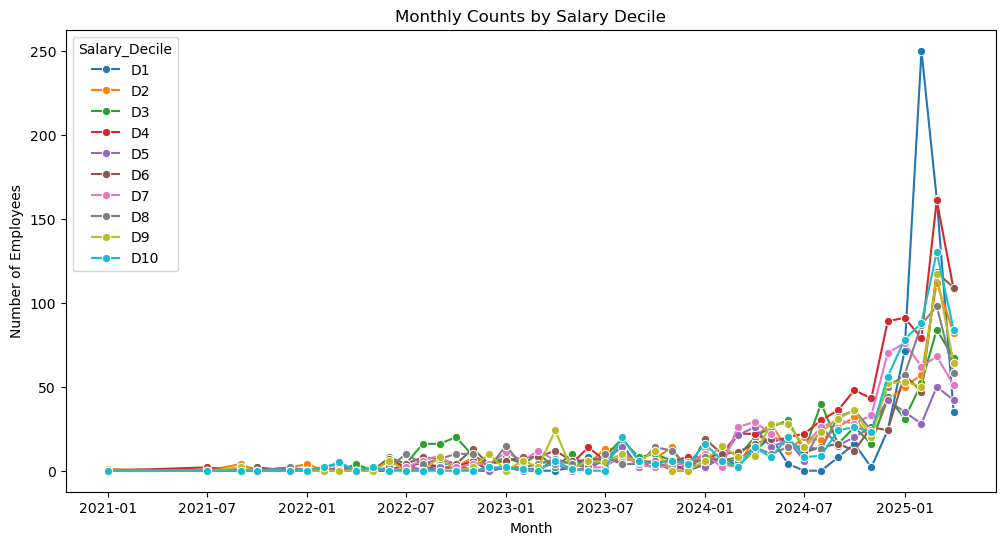

In [29]:
# plot raw counts over time
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=decile_trends,
    x='Posting_Month',
    y='Count',
    hue='Salary_Decile',
    marker='o')
plt.title('Monthly Counts by Salary Decile')
plt.xlabel('Month')
plt.ylabel('Number of Employees')

<Axes: xlabel='Salary_From', ylabel='Count'>

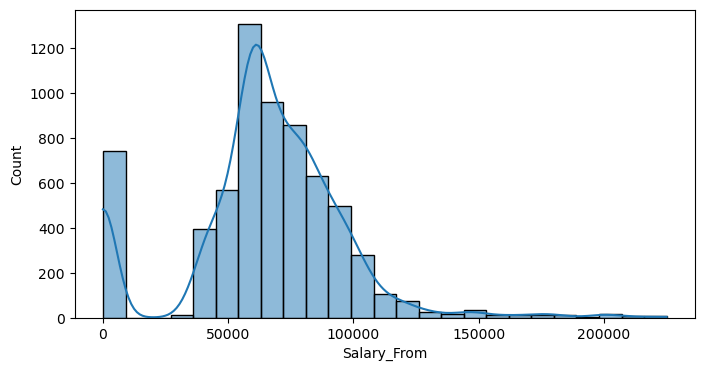

In [30]:
# create a density plot to show salary distribution 
plt.figure(figsize=(8, 4))
sns.histplot(data['Salary_From'], kde=True, bins=25)

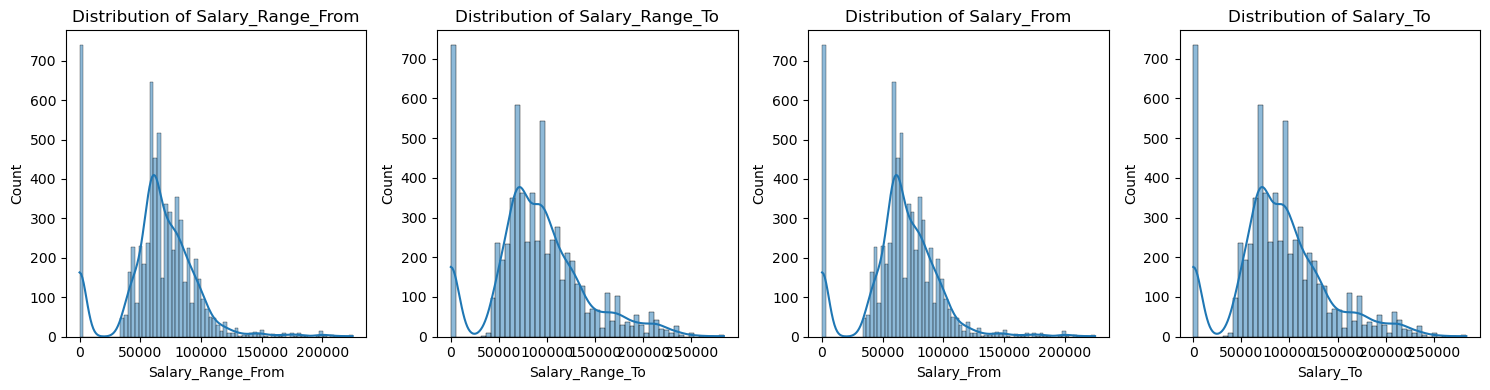

In [31]:
# Drop the columns
jobs_df = data.drop(columns=['Job_ID', '#_Of_Positions'])
# plot columns that contain numerical values 
numerical_cols = jobs_df.select_dtypes(include=['number']).columns
# numerical_cols
plt.figure(figsize=(15, 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 4, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [33]:
# create subset of the data to show annual salary distribution. Excluding hourly & daily salary info 
# calculate a representative annual salary 
annual_salaries['Average_Annual_Salary'] = (annual_salaries['Salary_Range_From'] + annual_salaries['Salary_Range_To']) / 2

Text(0, 0.5, 'Density')

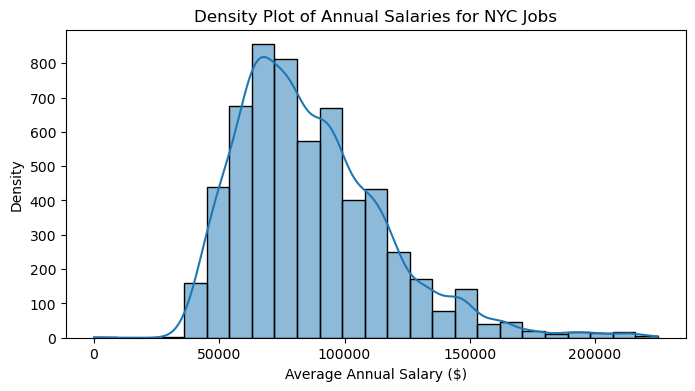

In [34]:
# histogram/density plot of annual salaries - has hourly & daily salaries removed 
plt.figure(figsize=(8, 4))
sns.histplot(annual_salaries['Average_Annual_Salary'], kde=True, bins=25)
plt.title('Density Plot of Annual Salaries for NYC Jobs')
plt.xlabel('Average Annual Salary ($)')
plt.ylabel('Density')

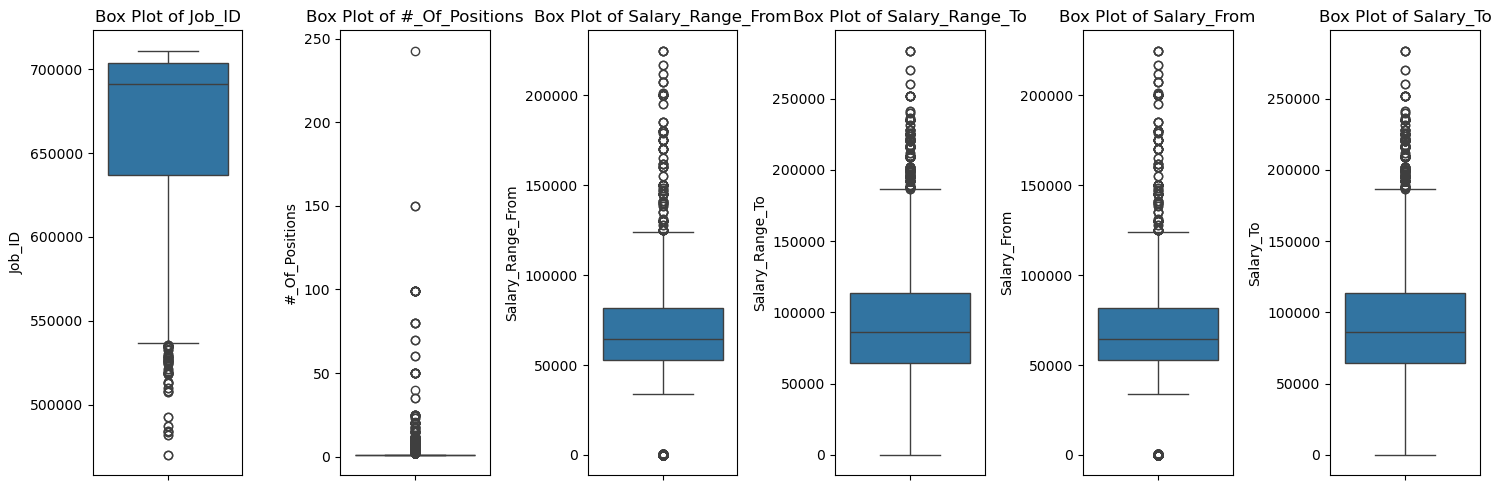

In [35]:
numerical_cols = data.select_dtypes(include=['number']).columns
num_numerical_cols = len(numerical_cols)
# create a boxplot to visualize outliers for numeric columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 6, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

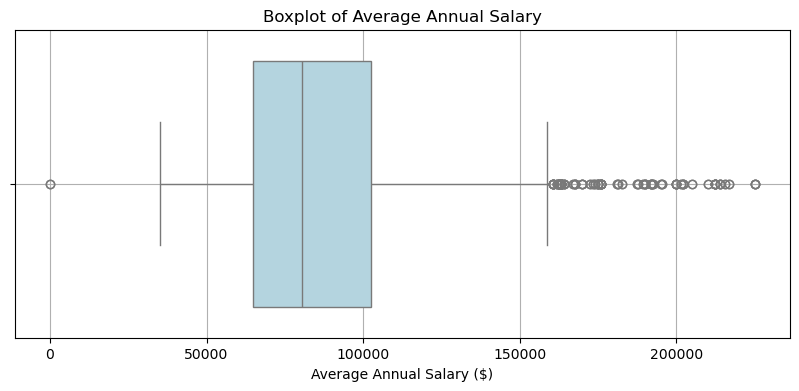

In [36]:
# create a boxplot to visualize any salary outliers 
plt.figure(figsize=(10, 4))
sns.boxplot(x=annual_salaries['Average_Annual_Salary'], color='lightblue')
plt.title('Boxplot of Average Annual Salary')
plt.xlabel('Average Annual Salary ($)')
plt.grid(True)
plt.show()

## Bivariate Analysis 

In [37]:
data.head()

,Job_ID,Civil_Service_Title,Agency,#_Of_Positions,Business_Title,Posting_Type,Job_Category,Career_Level,Salary_Frequency,Salary_Range_From,Salary_Range_To,Posting_Date,Full-Time_Part-Time_indicator,Posting_Month,Salary_From,Salary_To,Salary_Decile
0,705427,Public Health Adviser (School,Dept Of Health/Mental Hygiene,1,"Public Health Adviser, Bureau Of School Health",External,Health,Experienced (non-manager),Hourly,24.1,27.71,2025-03-05,P,2025-03,24.1,27.71,D1
1,709397,Administrative Contract Specia,Dept Of Health/Mental Hygiene,1,"Contract Manager, Center For Population Health...",External,"Finance, Accounting, & Procurement",Experienced (non-manager),Annual,66067.0,95000.00,2025-03-31,F,2025-03,66067.0,95000.00,D6
2,622069,Admin Community Relations Spec,Dept. Of Homeless Services,1,Jcc Manager,Internal,Constituent Services & Community Programs Soci...,Experienced (non-manager),Annual,64749.0,69826.00,2024-01-05,F,2024-01,64749.0,69826.00,D6
3,703369,College Aide (All City Depts),Dept Of Health/Mental Hygiene,1,"Food Borne Intern, Bureau Of Environmental Dis...",Internal,Health,Student,Hourly,17.0,21.40,2025-02-19,P,2025-02,17.0,21.40,D1
4,633825,"City Assessor (I,Ii,Iiia,Iiib)",Tax Commission,1,City Assessor Hearing Officer Deputy Director,Internal,"Policy, Research & Analysis",Experienced (non-manager),Annual,0.0,147110.00,2024-04-18,F,2024-04,0.0,147110.00,D1


In [38]:
# create a function to consolidate job categories 
def consolidated_job (cat):
    cat = cat.lower()
    if 'administration & human resources' in cat:
        return 'Administration & HR'
    elif 'building operations & maintenance' in cat:
        return 'Building Operations'
    elif 'communications & intergovernmental affairs' in cat:
        return 'Communications'
    elif 'engineering' in cat:
        return 'Engineering'
    elif 'finance' in cat or 'accounting' in cat or 'procurement' in cat:
        return 'Finance & Procurement'
    elif 'technology' in cat or 'data' in cat:
        return 'Technology'
    elif 'policy' in cat or 'research' in cat:
        return 'Policy & Research'
    elif 'public safety' in cat:
        return 'Public Safety'
    elif 'legal' in cat:
        return 'Legal Affairs'
    elif 'health' in cat:
        return 'Health'
    elif 'social services' in cat:
        return 'Social Services'
    else:
        return 'Other'        

annual_salaries['Consolidated_Category'] = annual_salaries['Job_Category'].apply(consolidated_job)

In [39]:
# group by new consolidated job category 
category_salary_stats = annual_salaries.groupby('Consolidated_Category')['Average_Annual_Salary'].agg(['count', 'mean', 'median', 'min', 'max']).sort_values('mean', ascending=False)

print(category_salary_stats.head(10))

                       count           mean     median      min       max
Consolidated_Category                                                    
Technology               425  102761.909412  102500.00  42092.0  195061.0
Legal Affairs            390   96667.969231   89951.00  48425.0  214000.0
Engineering             1576   92483.048541   90964.75  44497.5  175973.5
Policy & Research        467   91467.960385   91354.50  42092.0  214000.0
Finance & Procurement    500   89253.824000   80311.00  46379.0  212209.0
Communications           162   86756.805556   77085.00  39119.0  201968.0
Administration & HR      657   82640.745358   77000.00     26.6  225000.0
Health                   487   77495.210472   72396.50  39717.0  210000.0
Public Safety            419   74007.856802   66608.50  37182.0  216922.0
Social Services          317   73332.470032   68947.50  39119.0  225000.0


In [40]:
# group by agency
agency_salary_stats = annual_salaries.groupby('Agency')['Average_Annual_Salary'].agg(['count', 'mean', 'median', 'min', 'max']).sort_values('mean', ascending=False)

print(agency_salary_stats.head(10))

                                count           mean     median       min  \
Agency                                                                      
Department Of Sanitation            2  163063.000000  163063.00  163063.0   
Office Of Labor Relations           2  144878.500000  144878.50  144878.5   
Technology & Innovation            19  131097.342105  133996.00   76064.0   
Municipal Water Fin Authority       2  128383.500000  128383.50  128383.5   
Tax Commission                      5  126946.400000  117525.50   73555.0   
Department Of Correction          134  121210.559701  108038.25   41383.5   
Office Of The Comptroller          37  112467.270270  100000.00   61802.0   
Nyc Fire Pension Fund               2  110953.000000  110953.00  110953.0   
Financial Info Svcs Agency         24  106410.666667  103250.00   77284.0   
Mayors Office Of Contract Svcs      8  105891.375000  112620.25   55825.0   

                                     max  
Agency                          

In [41]:
# retrieve the top 10 job categories by count 
top_categories = annual_salaries['Consolidated_Category'].value_counts().nlargest(10).index
# filter the dataframe based on the top 10 job categories 
filtered_df = annual_salaries[annual_salaries['Consolidated_Category'].isin(top_categories)]

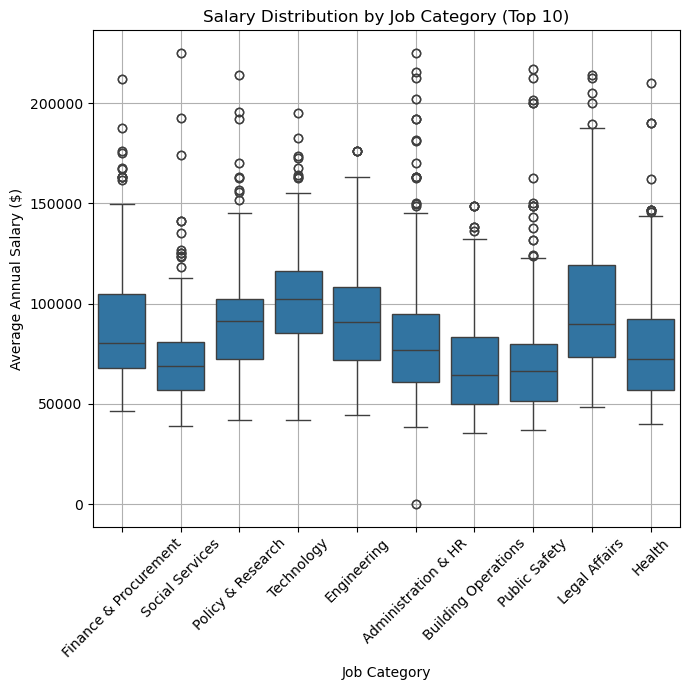

In [68]:
# create a boxplot to view the salary distribution of the top 10 consolidated job categories 
plt.figure(figsize=(7, 7))
sns.boxplot(data=filtered_df, x='Consolidated_Category', y='Average_Annual_Salary')
plt.xticks(rotation=45)
plt.title('Salary Distribution by Job Category (Top 10)')
plt.ylabel('Average Annual Salary ($)')
plt.xlabel('Job Category')
plt.grid(True)
plt.tight_layout()

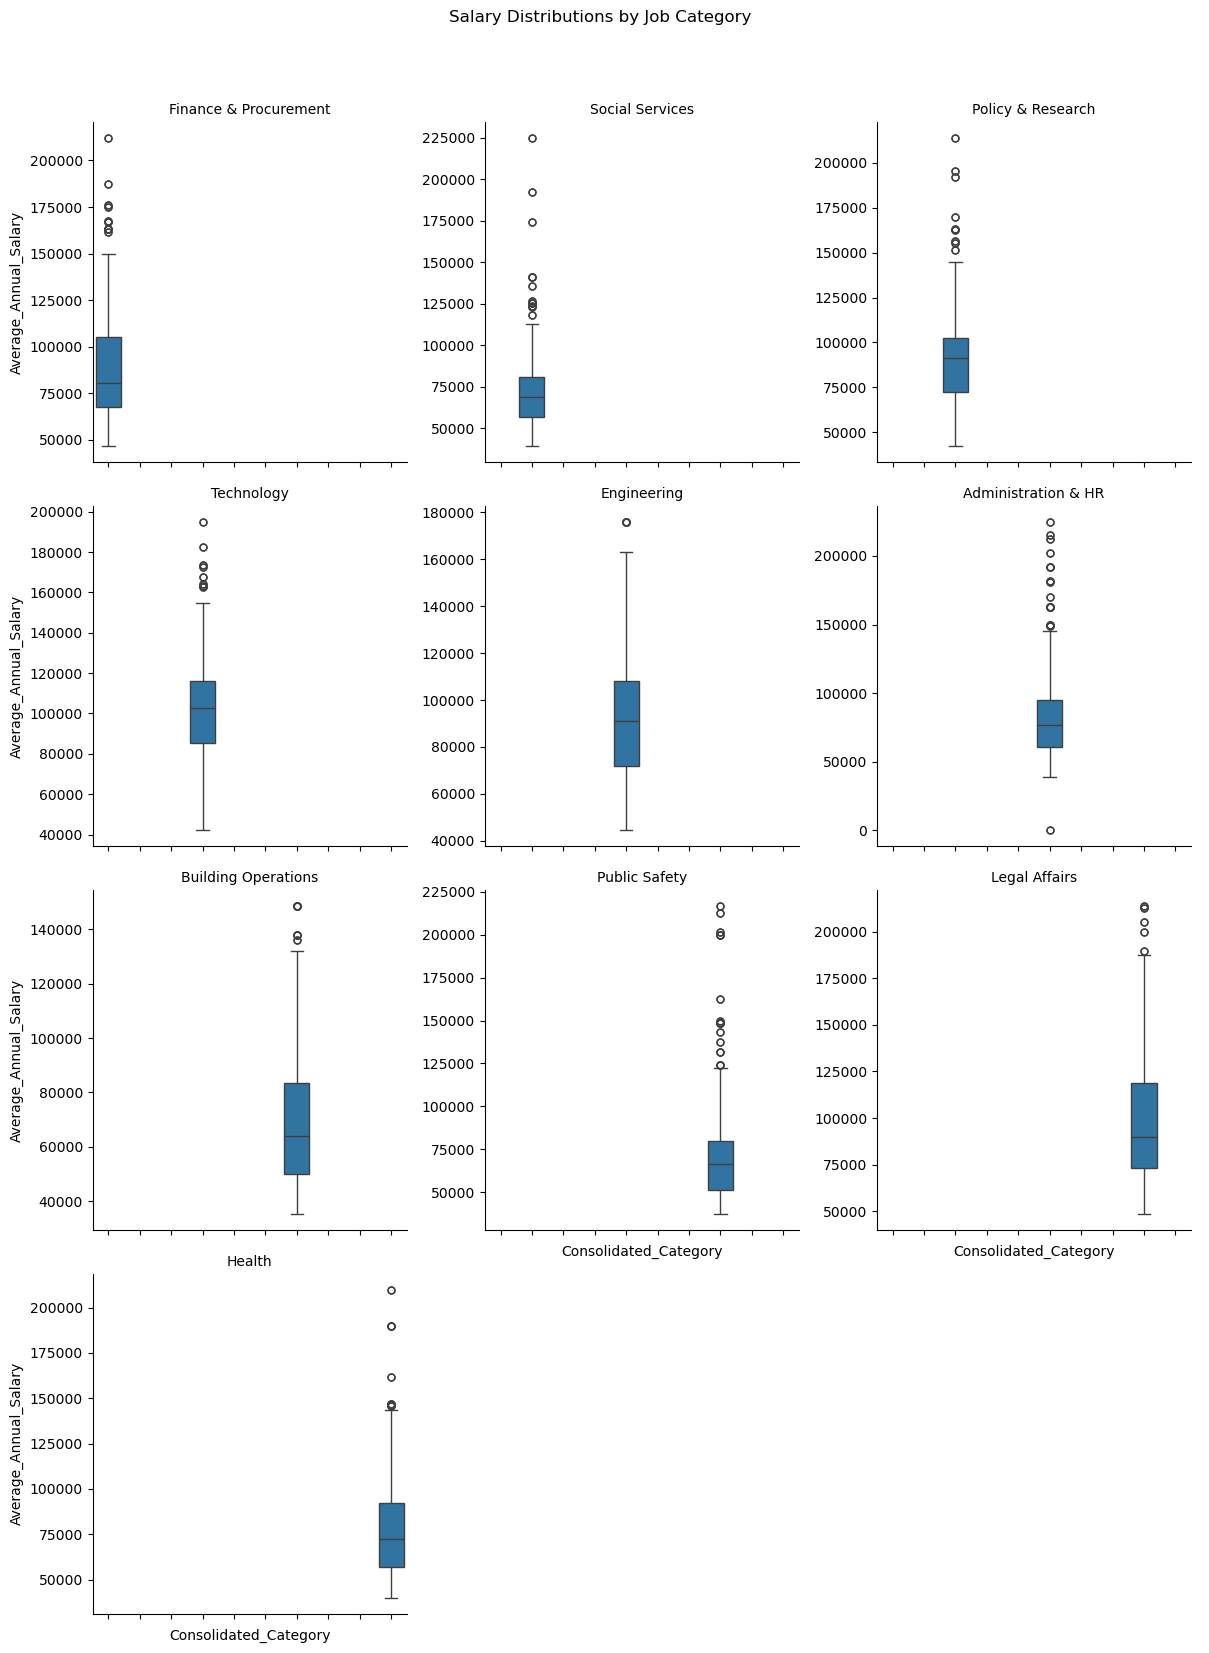

In [43]:
# alternate view of the boxplot 
g = sns.catplot(
    data=filtered_df,
    x='Consolidated_Category',
    y='Average_Annual_Salary',
    col='Consolidated_Category',       
    kind='box',
    col_wrap=3,                # Control layout to 3 plots per row
    height=4,                  # Height of each subplot
    aspect=1,                  # Aspect ratio of each subplot
    sharey=False               # Let each subplot have its own y-axis
)
g.set_titles("{col_name}")    # Clean titles
g.set_xticklabels(rotation=45)
g.fig.suptitle("Salary Distributions by Job Category", y=1.03)
plt.tight_layout()
plt.show()


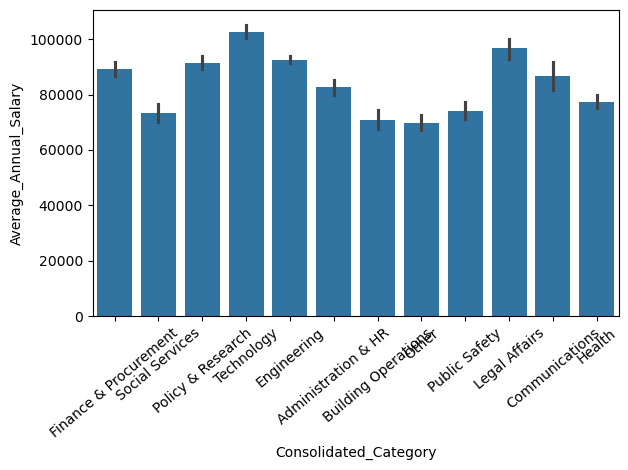

In [44]:
# annual_salaries.head()
sns.barplot(data=annual_salaries, x='Consolidated_Category', y='Average_Annual_Salary', )
    # plt.title(f"Top 10 {col}")
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

In [45]:
# Covariance and Correlation
covariance_matrix = data[numerical_cols].cov()
covariance_matrix
# print("\nCovariance Matrix:\n", covariance_matrix.to_markdown(numalign="left", stralign="left"))

,Job_ID,#_Of_Positions,Salary_Range_From,Salary_Range_To,Salary_From,Salary_To
Job_ID,2.290694e+09,-5773.093502,-4.433878e+07,-2.312280e+08,-4.433878e+07,-2.312280e+08
#_Of_Positions,-5.773094e+03,43.854676,-2.076508e+04,-3.008941e+04,-2.076508e+04,-3.008941e+04
Salary_Range_From,-4.433878e+07,-20765.084776,1.022921e+09,1.287725e+09,1.022921e+09,1.287725e+09
Salary_Range_To,-2.312280e+08,-30089.406780,1.287725e+09,2.500605e+09,1.287725e+09,2.500605e+09
Salary_From,-4.433878e+07,-20765.084776,1.022921e+09,1.287725e+09,1.022921e+09,1.287725e+09
Salary_To,-2.312280e+08,-30089.406780,1.287725e+09,2.500605e+09,1.287725e+09,2.500605e+09


In [69]:
# determine the top 10 agencies by total postings
top10_agencies = annual_salaries['Agency'].value_counts().head(10).index.tolist()
# filter down to just those agencies
df_top10 = annual_salaries[annual_salaries['Agency'].isin(top10_agencies)]

In [71]:
#count number of postings per Agency × Job Category
counts = (
    df_top10
      .groupby(['Agency', 'Consolidated_Category'])
      .size()
      .reset_index(name='Count')
)

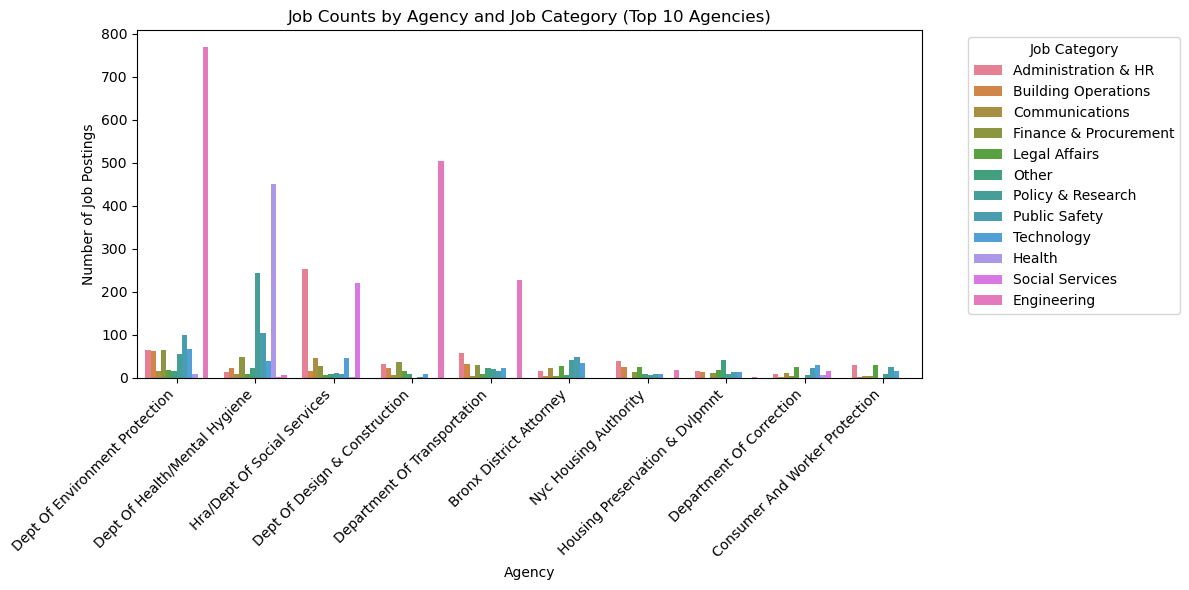

In [73]:
# plot with Seaborn as a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=counts,
    x='Agency',
    y='Count',
    hue='Consolidated_Category',
    order=top10_agencies    # keep agencies sorted by overall volume
)
plt.xticks(rotation=45, ha='right')
plt.title("Job Counts by Agency and Job Category (Top 10 Agencies)")
plt.xlabel("Agency")
plt.ylabel("Number of Job Postings")
plt.legend(title="Job Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [46]:
# Drop rows with missing values in either column
salary_data = annual_salaries[['Salary_Range_From', 'Salary_Range_To']].dropna()

In [47]:
# Calculate Pearson correlation for annual salaries (Daily & Hourly removed)
correlation = salary_data.corr(method='pearson')

# Print the result
print("Pearson Correlation between Salary Range From and To:")
print(correlation)

Pearson Correlation between Salary Range From and To:
                   Salary_Range_From  Salary_Range_To
Salary_Range_From           1.000000         0.651529
Salary_Range_To             0.651529         1.000000


Text(0, 0.5, 'Salary Range To')

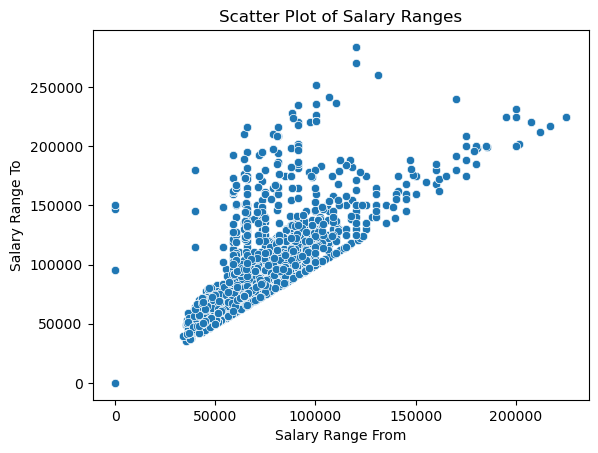

In [48]:
# scatterplot to visualize the correlation between annual salary ranges 
sns.scatterplot(data=salary_data, x='Salary_Range_From', y='Salary_Range_To')
plt.title('Scatter Plot of Salary Ranges')
plt.xlabel('Salary Range From')
plt.ylabel('Salary Range To')
# there is a moderate positive linear relationship between the starting & ending salary range 

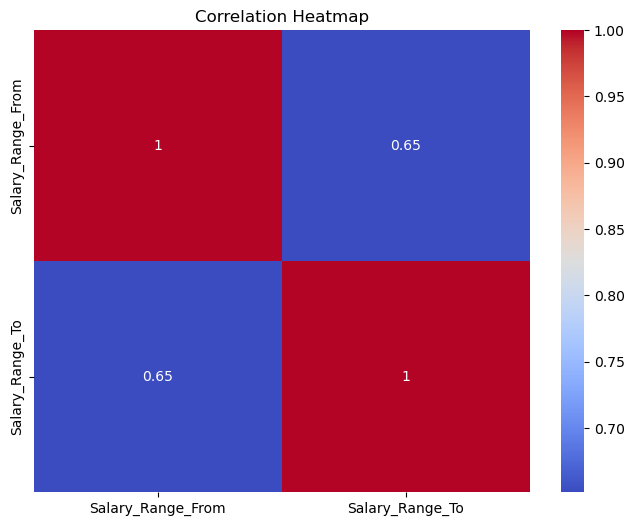

In [49]:
# Correlation heatmap for annual salary data
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

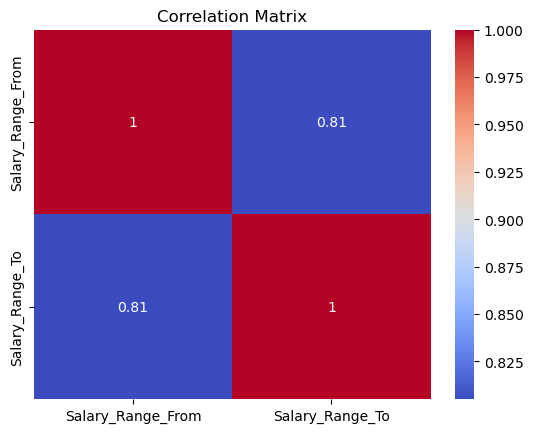

In [50]:
# Heatmap of correlation of all in salaries from/to
sns.heatmap(data[['Salary_Range_From', 'Salary_Range_To']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Test Statistics

## Null Hypothesis: There is no significant difference in mean salaries across job categories.
Alternative Hypothesis: There is a significant difference salaries across job categories.

In [51]:
# check the sizes of the consolidated job categories
print(annual_salaries['Consolidated_Category'].value_counts())

Consolidated_Category
Engineering              1576
Administration & HR       657
Finance & Procurement     500
Health                    487
Policy & Research         467
Technology                425
Public Safety             419
Legal Affairs             390
Social Services           317
Building Operations       231
Other                     199
Communications            162
Name: count, dtype: int64


In [52]:
# Get salaries grouped by Job Category
groups = [group['Average_Annual_Salary'].values 
          for name, group in annual_salaries.groupby('Consolidated_Category') if len(group) > 20]

In [53]:
# Run a one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_value)
# There is strong statistical evidence that average salaries differ significantly across job categories 

ANOVA F-statistic: 58.11478805185527
p-value: 4.488530906966167e-123


In [54]:
# Run a t-test to compare salaries for two categories -  Tech & Engineering
eng = annual_salaries[annual_salaries['Consolidated_Category'] == 'Engineering']['Average_Annual_Salary']
tech = annual_salaries[annual_salaries['Consolidated_Category'] == 'Technology']["Average_Annual_Salary"]

# Run independent t-test
t_stat, p_val = stats.ttest_ind(eng, tech, equal_var=False)

print("T-test statistic:", t_stat)
print("p-value:", p_val)

T-test statistic: -7.075985976409062
p-value: 4.015684309748883e-12


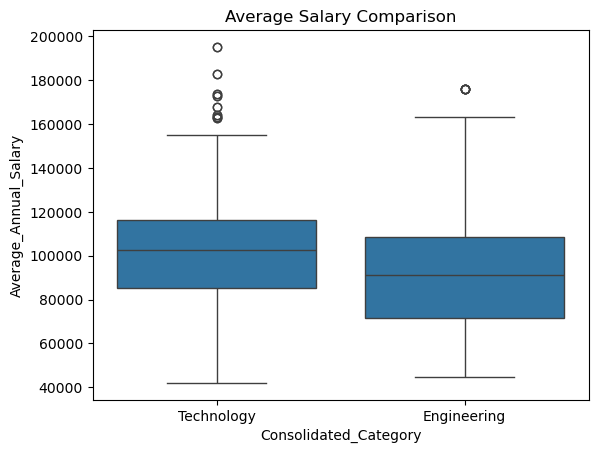

In [148]:
sns.boxplot(data=annual_salaries[annual_salaries['Consolidated_Category'].isin(['Engineering', 'Technology'])], 
            x='Consolidated_Category', y='Average_Annual_Salary')
plt.title("Average Salary Comparison")
plt.show()

In [55]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# test to compare avg salaries across multiple job categories
tukey = pairwise_tukeyhsd(endog=annual_salaries['Average_Annual_Salary'], groups=annual_salaries['Consolidated_Category'], alpha=0.05)
print(tukey)

                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
        group1                group2          meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------------------------------------
  Administration & HR   Building Operations -11862.4467    0.0 -18908.2298  -4816.6635   True
  Administration & HR        Communications   4116.0602 0.8838  -3963.9744  12196.0948  False
  Administration & HR           Engineering   9842.3032    0.0   5564.7538  14119.8526   True
  Administration & HR Finance & Procurement   6613.0786 0.0044   1146.5647  12079.5925   True
  Administration & HR                Health  -5145.5349 0.0937 -10653.3241    362.2543  False
  Administration & HR         Legal Affairs  14027.2239    0.0   8139.1966  19915.2512   True
  Administration & HR                 Other -12968.4071    0.0 -20421.5444  -5515.2698   True
  Administration & HR     Policy & Research    8827.215    0

## Regression & Classification Analysis

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [57]:
# Use a linear regression model to predict the salary based on different variables 
# Select features and target
X = annual_salaries[['Consolidated_Category', 'Agency']]
y = annual_salaries['Salary_Range_From']

In [58]:
# Build the pipeline 
categorical_cols = ['Consolidated_Category', 'Agency']
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [59]:
# Drop missing data
data_model = annual_salaries.dropna(subset=['Salary_Range_From', 'Consolidated_Category', 'Agency'])
X = data_model[categorical_cols]
y = data_model['Salary_Range_From']

In [60]:
# Create split of training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# fit and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [64]:
# Evaluate results 
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 504583102.0910473
R2 Score: 0.10960592914481038


In [65]:
# Classification (Full Time vs Part Time)
# Target variable
annual_salaries['is_full_time'] = (annual_salaries['Full-Time_Part-Time_indicator'] == 'F').astype(int)

In [67]:
annual_salaries['Consolidated_Category'].value_counts()

Consolidated_Category
Engineering              1576
Administration & HR       657
Finance & Procurement     500
Health                    487
Policy & Research         467
Technology                425
Public Safety             419
Legal Affairs             390
Social Services           317
Building Operations       231
Other                     199
Communications            162
Name: count, dtype: int64

In [99]:
X = annual_salaries[['Consolidated_Category', 'Agency']]
y = annual_salaries['is_full_time']

In [100]:
# Create a classification pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced')) # to give more weight to the minority class as there are less part time positions
])


In [101]:
# create training and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [102]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8319039451114922
Classification Report:
               precision    recall  f1-score   support

           0       0.01      0.33      0.01         3
           1       1.00      0.83      0.91      1163

    accuracy                           0.83      1166
   macro avg       0.50      0.58      0.46      1166
weighted avg       1.00      0.83      0.91      1166



In [97]:
print("Training class distribution:\n", y_train.value_counts())
print("Test class distribution:\n", y_test.value_counts())

Training class distribution:
 is_full_time
1    4651
0      13
Name: count, dtype: int64
Test class distribution:
 is_full_time
1    1163
0       3
Name: count, dtype: int64


## Advanced Analysis Techniques  

In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [107]:
# Clustering (K-Means)
# Reuse preprocessed numerical features
X_encoded = preprocessor.fit_transform(X)

In [109]:
# PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

In [110]:
# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

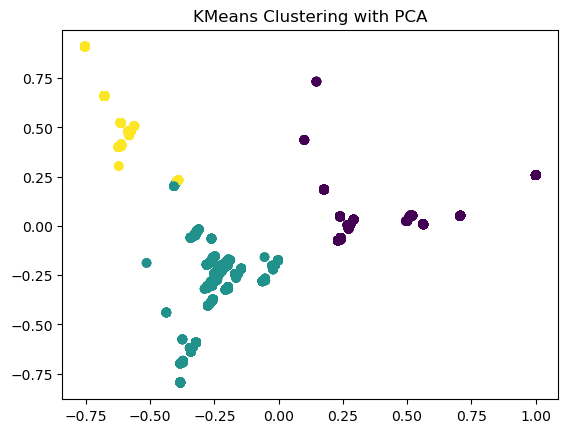

In [111]:
# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.title("KMeans Clustering with PCA")
plt.show()

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [114]:
# Create the pipeline 
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

In [116]:
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest RMSE: 0.002944595369475112
R2 Score: -0.14741825799429797
